# Exercise 2: Fit a power law and Gaussian line

In [1]:
from pyspex.spex import Session
s=Session()
import numpy

 Welcome jellep to SPEX version 3.07.03

 NEW in this version of SPEX: 
01-12-2022 Fixed issue with plot cap command
05-12-2022 Fixed issue with knak model
22-03-2023 Fixed issue with treatment of bad quality bins in trafo
23-03-2023 Fixed small issues in the pyspex interface

 Currently using SPEXACT version 2.07.00. Type `help var calc` for details.


## Read in the data and ignore energy bands

We read in the the spectrum and response. Then we ignore parts of the spectrum that have very low flux and/or are not well calibrated.

In [2]:
s.data("powgaus.res","powgaus.spo")

0

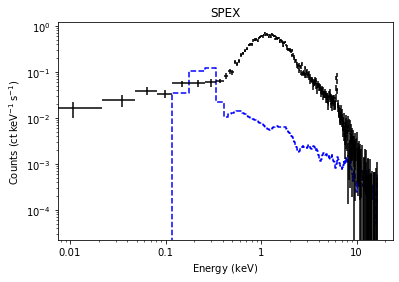

In [3]:
s.plot_data(xlog=True,ylog=True)

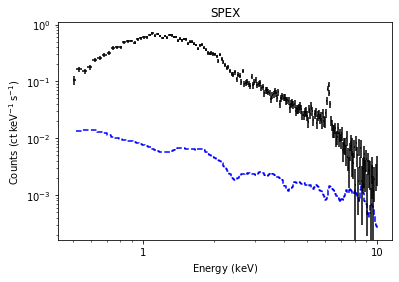

In [4]:
s.ignore(1,1,0.,0.5,'kev')
s.ignore(1,1,10.,1000.,'kev')
s.plot_data(xlog=True,ylog=True)

## Set up the model

As a first step, we set up a redshifted and absorbed power law to get the continuum right. Set initial parameters such that the model is not too far from the data points and then fit. Make sure that the redshift is fixed before the fit.

In [5]:
s.com('reds')
s.com('absm')
s.com('po')
s.com_rel(1,3,numpy.array([1,2]))

 You have defined    1 component.
 You have defined    2 components.
 You have defined    3 components.


In [6]:
s.par(1,1,'z',0.0345)
s.dist(1,0.0345,'z')
s.par(1,2,'nh',2E-3,thawn=True)
s.par(1,3,'norm',1E+8,thawn=True)
s.calc()

 Distances assuming H0 =  70.0 km/s/Mpc, Omega_m = 0.300 Omega_Lambda = 0.700 Omega_r = 0.000
Sector       m      A.U.        ly        pc       kpc       Mpc  redshift        cz   age(yr)
----------------------------------------------------------------------------------------------
   1 4.680E+24 3.128E+13 4.946E+08 1.517E+08 1.517E+05  151.6574    0.0345   10342.8 4.701E+08
----------------------------------------------------------------------------------------------



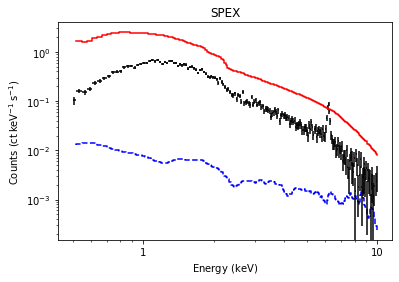

In [7]:
s.plot_data(xlog=True,ylog=True)

 fit iter  100                                                   
   60784.0              4  2.000E-03  1.000E+08   2.00
 You cannot plot this frame since nothing is defined
 
   4046.49              8  3.226E-03  2.260E+07   2.14
 You cannot plot this frame since nothing is defined
 
   1046.97             12  4.731E-03  3.977E+07   2.31
 You cannot plot this frame since nothing is defined
 
   585.773             16  4.647E-03  4.564E+07   2.30
 You cannot plot this frame since nothing is defined
 
   585.187             20  4.658E-03  4.600E+07   2.30
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift             3.4499999E-02 frozen   -1.0      1.00E+10
   1    1 reds flag Flag: cosmo=0, vel=1  0.000000     frozen    0.0       1.0

   1    2 absm nh 

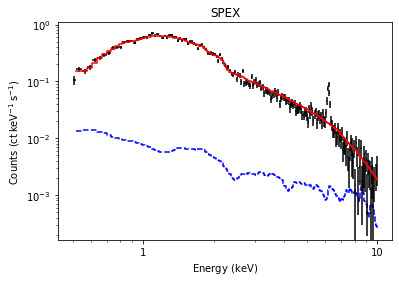

In [8]:
s.fit()
s.plot_data(xlog=True,ylog=True)

### Adding the Gaussian line

Now that we have a good fit of the continuum, we can add the Gaussian line. Make sure that you set a large normalization, because the source is at a large distance!

In [9]:
s.com('gaus')
s.com_rel(1,4,numpy.array([1,2]))

 You have defined    4 components.


In [10]:
s.par_show()

---------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit      value     status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift               0.0345000   frozen       -1.0   1.0E+10           
   1    1 reds flag Flag: cosmo=0, vel=1     0.00000   frozen        0.0       1.0           

   1    2 absm nh   Column (1E28/m**2)    0.00465759   thawn         0.0   1.0E+20           
   1    2 absm fcov Covering fraction        1.00000   frozen        0.0       1.0           

   1    3 pow  norm Norm (1E44 ph/s/keV) 4.60033E+07   thawn         0.0   1.0E+20           
   1    3 pow  gamm Photon index             2.30487   thawn        -10.       10.           
   1    3 pow  dgam Photon index break       0.00000   frozen       -10.       10.           
   1    3 pow  e0   Break energy (keV)   1.00000E+10   frozen        0.0   1.0E+20           
   1    3 pow  b    Break strength           0.

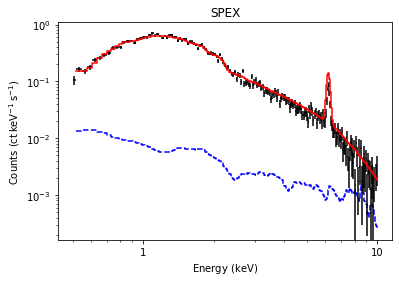

In [11]:
s.par(1,4,'norm',1E+6,thawn=True)
s.calc()
s.plot_data(xlog=True,ylog=True)

 fit iter  100                                                   
   358.500              7  4.658E-03  4.600E+07   2.30      1.000E+06   6.40
                0.100
 You cannot plot this frame since nothing is defined
 
   195.307             14  4.944E-03  4.997E+07   2.42      4.064E+05   6.40
                7.024E-02
 You cannot plot this frame since nothing is defined
 
   186.334             21  4.950E-03  5.023E+07   2.42      4.934E+05   6.40
                3.670E-02
 You cannot plot this frame since nothing is defined
 
   186.302             28  4.951E-03  5.024E+07   2.42      4.985E+05   6.40
                3.150E-02
 You cannot plot this frame since nothing is defined
 
   186.302             35  4.951E-03  5.024E+07   2.42      4.985E+05   6.40
                3.101E-02
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     

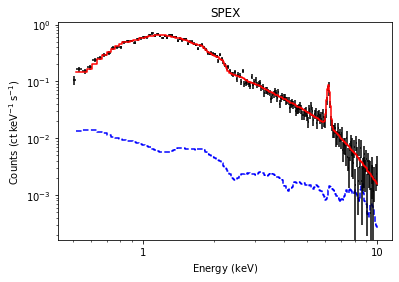

In [12]:
s.fit()
s.plot_data(xlog=True,ylog=True)

## Calculate the equivalent width of the Gaussian line

The equivalent width is defined as the flux of the spectral line divided by the flux in the continuum. Since the line has a small width, we can select a small energy band around the line to determine the total flux of the line and the flux of the continuum in this band. Note that the flux of the line will be something like photons/m^2/s and the continuum flux will be photons/m^2/s/keV. Because the continuum flux is per keV, choosing the width of the band of 1 keV is easy. You will also see that the unit of the equivalent width becomes keV (so it is indeed a width in energy!). We therefore calculate the flux between 5.9 and 6.9 keV here:  

In [13]:
s.elim(5.9,6.9,'kev')

 Fluxes and luminosities will be calculated between   5.90000     and   6.90000     keV



The flux can be obtained with the `s.flux_get()` command in pyspex. For the error, you can take the normalizations of both the powerlaw and the Gaussian. In practice, the error on the Gaussian line normalisation will often dominate the error. This is how the equivalent width and error are calculated.

Make sure that you calculate the model before getting the flux. With the `copy.deepcopy` command we can make sure that python copies the object containing the flux values into the variable. By default python saves the reference to the object in the variable (not the object itself. This means that when the object is updated, the old object is gone! Copying ensures that you keep the values.

In [14]:
# Calculate equivalent width and error
import math
import copy
s.calc()
fluxpo=copy.deepcopy(s.flux_get(1,3))
s.calc()
fluxga=copy.deepcopy(s.flux_get(1,4))
err_po = s.error(1,3,'norm')
err_ga = s.error(1,4,'norm')

 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023517E+07      186.30       0.00000        0.00
  5.023516E+07      186.30      -12.0000        0.00
  5.023505E+07      186.30      -120.000       -0.00
  5.023398E+07      186.30      -1192.00        0.00
  5.022325E+07      186.30      -11920.0        0.00
  5.011596E+07      186.31      -119208.        0.01
  4.904308E+07      187.24     -1.192092E+06    0.94
  4.785098E+07      190.17     -2.384184E+06    3.87
  4.904308E+07      187.24     -1.192092E+06    0.94
  4.901939E+07      187.28     

In [15]:
# Calculate the equivalent width + error
ew = fluxga.enerflux / fluxpo.enerflux
epo = (err_po.uerr - err_po.lerr)/(err_po.value * 2.0)
ega = (err_ga.uerr - err_ga.lerr)/(err_ga.value * 2.0)
eew = ew * math.sqrt(epo**2 + ega**2)
print("Equivalent width = {0} +/- {1}".format(ew, eew))

Equivalent width = 0.8960068821907043 +/- 0.07110149854816791


## Calculate the other errors on free parameters

In [16]:
err_nh=s.error(1,2,'nh')
err_pnorm=s.error(1,3,'norm')
err_pgamm=s.error(1,3,'gamm')
err_gener=s.error(1,4,'e')
err_gfwhm=s.error(1,4,'fwhm')

 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
  4.911725E-03      186.47     -3.885804E-05    0.17
  4.856027E-03      187.31     -9.455578E-05    1.00
  4.989441E-03      186.47      3.885804E-05    0.17
  5.045642E-03      187.30      9.505916E-05    1.00
 Parameter   1    2 nh  :   4.95058E-03 Errors:  -9.45558E-05 ,   9.50592E-05
 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
  4.900719E+07      187.30     -1.227980E+06    1.00
  5.149958E+07      187.30      1.264412E+06    1.00
 Parameter   1    3 norm:   5.02352E+07 Errors:  -1.22798E+06 ,   1.26441E+06
 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
   2

In [18]:
s.par_show_classic()

--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1    1 reds z    Redshift             3.4499999E-02 frozen   -1.0      1.00E+10
   1    1 reds flag Flag: cosmo=0, vel=1  0.000000     frozen    0.0       1.0

   1    2 absm nh   Column (1E28/m**2)   4.9505830E-03 thawn     0.0      1.00E+20
   1    2 absm fcov Covering fraction     1.000000     frozen    0.0       1.0

   1    3 pow  norm Norm (1E44 ph/s/keV) 5.0235168E+07 thawn     0.0      1.00E+20
   1    3 pow  gamm Photon index          2.420110     thawn    -10.       10.
   1    3 pow  dgam Photon index break    0.000000     frozen   -10.       10.
   1    3 pow  e0   Break energy (keV)   1.0000000E+10 frozen    0.0      1.00E+20
   1    3 pow  b    Break strength        0.000000     frozen    0.0       10.
   1    3 pow  type Type of norm          0.000000     frozen    0.0     